In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [20]:
gdf = gpd.read_file('sh_statbel_statistical_sectors.geojson')

In [7]:
gdf.head()

PKUID  OBJECTID  CD_SECTOR  TX_SECTOR_DESCR_NL  TX_SECTOR_DESCR_FR  \
0      1         3  11001A00-  AARTSELAAR-CENTRUM  AARTSELAAR-CENTRUM   
1      2         4  11001A01-        DE LEEUWERIK        DE LEEUWERIK   
2      3         5  11001A020           BUERSTEDE           BUERSTEDE   
3      4         6  11001A030            YSSELAAR            YSSELAAR   
4      5         7  11001A042       KLEINE GRIPPE       KLEINE GRIPPE   

  CD_SUB_MUNTY  CD_MUNTY_REFNIS TX_MUNTY_DESCR_NL TX_MUNTY_DESCR_FR  \
0      11001A0            11001        Aartselaar        Aartselaar   
1      11001A0            11001        Aartselaar        Aartselaar   
2      11001A0            11001        Aartselaar        Aartselaar   
3      11001A0            11001        Aartselaar        Aartselaar   
4      11001A0            11001        Aartselaar        Aartselaar   

  TX_MUNTY_DESCR_DE  ...       TX_PROV_DESCR_EN  CD_RGN_REFNIS  \
0        Aartselaar  ...  Province of Antwerpen           2000   
1        Aartselaar  ...  Province of Antwerpen           2000   
2        Aartselaar  ...  Province of Antwerpen           2000   
3        Aartselaar  ...  Province of Antwerpen           2000   
4        Aartselaar  ...  Province of Antwerpen           2000   

  TX_RGN_DESCR_NL  TX_RGN_DESCR_FR TX_RGN_DESCR_DE  TX_RGN_DESCR_EN  CD_NUTS1  \
0   Vlaams Gewest  Région flamande   Vlaams Gewest  Flanders region       BE2   
1   Vlaams Gewest  Région flamande   Vlaams Gewest  Flanders region       BE2   
2   Vlaams Gewest  Région flamande   Vlaams Gewest  Flanders region       BE2   
3   Vlaams Gewest  Région flamande   Vlaams Gewest  Flanders region       BE2   
4   Vlaams Gewest  Région flamande   Vlaams Gewest  Flanders region       BE2   

  CD_NUTS2 CD_NUTS3                                           geometry  
0     BE21    BE211  MULTIPOLYGON (((151281.422 203009.297, 151305....  
1     BE21    BE211  MULTIPOLYGON (((151325.594 203677.297, 151336....  
2     BE21    BE211  MULTIPOLYGON (((150721.484 203547.500, 150719....  
3     BE21    BE211  MULTIPOLYGON (((151195.469 204236.891, 151237....  
4     BE21    BE211  MULTIPOLYGON (((151882.891 203814.203, 151879....  

[5 rows x 30 columns]

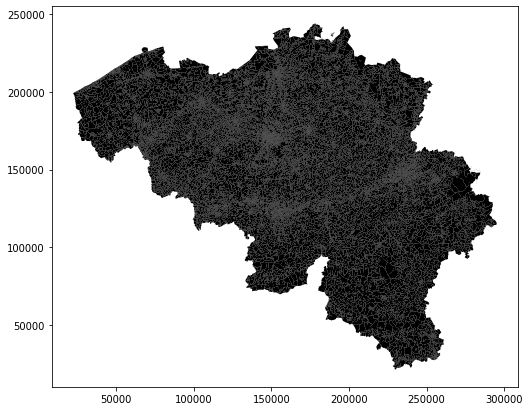

In [11]:
gdf.plot(figsize=(10,7), color='black')
plt.show()

In [33]:
columns_drop = ['PKUID','OBJECTID', 'TX_SECTOR_DESCR_FR', 'CD_SUB_MUNTY', 'TX_MUNTY_DESCR_FR', 'TX_MUNTY_DESCR_DE', \
               'CD_DSTR_REFNIS','TX_MUNTY_DESCR_EN', 'TX_ADM_DSTR_DESCR_NL', 'TX_ADM_DSTR_DESCR_DE', \
               'TX_ADM_DSTR_DESCR_EN', 'TX_ADM_DSTR_DESCR_FR', 'CD_PROV_REFNIS', 'TX_PROV_DESCR_FR', \
               'TX_PROV_DESCR_DE','TX_PROV_DESCR_EN', 'CD_RGN_REFNIS','TX_RGN_DESCR_FR', 'TX_RGN_DESCR_DE', \
               'TX_RGN_DESCR_EN','TX_RGN_DESCR_EN', 'CD_NUTS1', 'CD_NUTS2', 'CD_NUTS3','CD_MUNTY_REFNIS']

In [34]:
gdf_2 = gdf.drop([*columns_drop], axis=1)
gdf_2.head(2)

CD_SECTOR  TX_SECTOR_DESCR_NL TX_MUNTY_DESCR_NL     TX_PROV_DESCR_NL  \
0  11001A00-  AARTSELAAR-CENTRUM        Aartselaar  Provincie Antwerpen   
1  11001A01-        DE LEEUWERIK        Aartselaar  Provincie Antwerpen   

  TX_RGN_DESCR_NL                                           geometry  
0   Vlaams Gewest  MULTIPOLYGON (((151281.422 203009.297, 151305....  
1   Vlaams Gewest  MULTIPOLYGON (((151325.594 203677.297, 151336....

In [36]:
gdf_3 = gdf_2.rename(columns={"CD_SECTOR": "statsec", \
                      "TX_SECTOR_DESCR_NL": "statsec_name", \
                      "TX_MUNTY_DESCR_NL": "municipality", \
                     "TX_PROV_DESCR_NL": "province", \
                     "TX_RGN_DESCR_NL" : "region"})

In [39]:
gdf_3.crs

<Projected CRS: EPSG:31370>
Name: Belge 1972 / Belgian Lambert 72
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Belgium - onshore
- bounds: (2.5, 49.5, 6.4, 51.51)
Coordinate Operation:
- name: Belgian Lambert 72
- method: Lambert Conic Conformal (2SP)
Datum: Reseau National Belge 1972
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

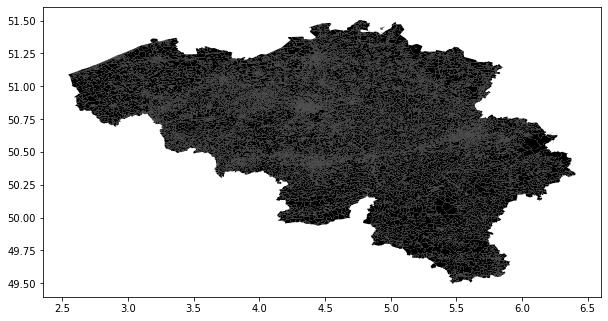

In [40]:
gdf_3 = gdf_3.to_crs("EPSG:4326")
gdf_3.plot(figsize=(10,7), color='black')

In [44]:
from collections import Counter
Counter(gdf_3.region)

Counter({'Vlaams Gewest': 9182,
         'Waals Gewest': 9876,
         'Brussels Hoofdstedelijk Gewest': 724})

In [47]:
print(len(gdf_3))
gdf_filtered = gdf_3[gdf_3['region'].isin(['Brussels Hoofdstedelijk Gewest', 'Vlaams Gewest'])]
print(len(gdf_filtered))

19782
9906


In [48]:
gdf_filtered.to_file("statsec_clean.geojson", driver="GeoJSON")

In [53]:
df1 = pd.DataFrame(gdf_filtered)
len(df1)
df1.drop(['geometry'], axis=1)
df1.to_csv('statsec_VL_BXL.csv', index=False)